# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2022/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday November 1st, 2022 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/ (we won't be doing peergrading, but we'll still use http://peergrade.io/ for the handin.)

# Data

This assignment will be based on the DC and Marvel superhero dataset you downloaded during the Week 4 exercises. It's important that you work with your own dataset.

You will need the network structure and the page texts to complete the assignment.

To show that you have collected these files, please place your files somewhere that's accessible online (e.g. a github repo or a webpage) and link to your files from your notebook. (We will appreciate it if you store the wiki pages in plain text and the network as an edgelist. )

# Basic Stats

Write a short paragraph describing the network. The paragraph should contain the following information

* The number of nodes and links. 
* The average, median, mode, minimum and maximum value of the network's in-degree.s And of the out-degrees.

We also want the degree distributions and a plot of the network

* Create in- and out-going degree distributions as described in Lecture 5.
* Estimate the slope of the incoming degree distribtion as described in Lecture 5.
* Plot the network using the Force Atlas algorithm as described in Lecture 5.

(Friendly hint: Remember figure captions.)

In [1]:
import pandas as pd
import pathlib
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import requests
import pickle
import re
import glob
import os
from scipy import stats

In [2]:
image_paths = glob.glob("C:/Users/guzma/OneDrive/Documents/TEC/DTU/02805/assignments/data/Characters_links/*.pkl")
print("Total Observations:\t", len(image_paths))

Total Observations:	 1786


In [5]:
entries = os.listdir('C:/Users/guzma/OneDrive/Documents/TEC/DTU/02805/assignments/data/Characters_links/')
char_check = [i.replace('.pkl','') for i in entries]
# char_check

### Marvel Data

In [7]:
marvel_path = pathlib.WindowsPath('C:/Users/guzma/OneDrive/Documents/TEC/DTU/02805/socialgraphs2022/files/marvel_pandas_1_3_5.pkl')

marvel_data = pd.read_pickle(marvel_path)
marvel_data.drop(columns=['Unnamed: 0'],inplace=True)

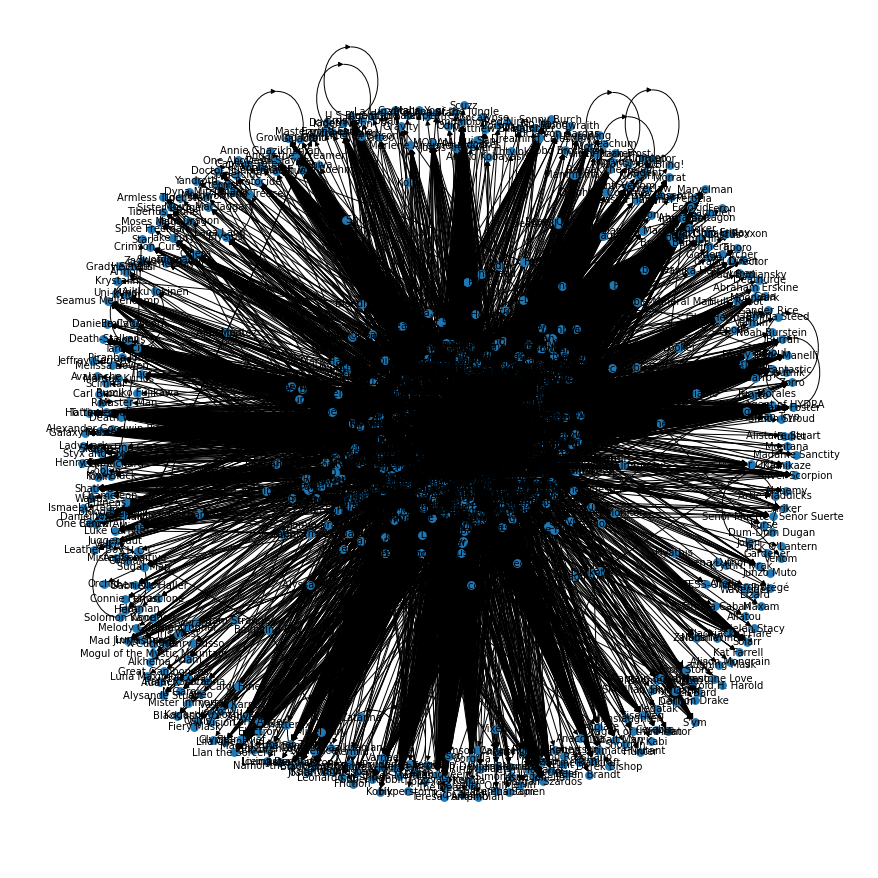

In [46]:
G = nx.DiGraph()
for char in char_check:
    character = pd.read_pickle('C:/Users/guzma/OneDrive/Documents/TEC/DTU/02805/assignments/data/Characters_links/{}.pkl'.format(char))
    for link in character:
        if link in marvel_data['CharacterName'].values:
            G.add_node(link)
            G.add_edge(char,link)
plt.figure(3,figsize=(12,12)) 
nx.draw(G, with_labels=True, node_size=60,font_size=10)
plt.show()

In [47]:
print(f'Number of edges : {G.size()}')
print(f'Number of nodes : {G.order()}')
print(f'Number of link list: {G.number_of_edges()}')
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
print(f'Max degree: {dmax}')

Number of edges : 79417
Number of nodes : 1816
Number of link list: 79417
Max degree: 959


#### In Degrees

In [48]:
# len(G.in_degree())
x = dict(G.in_degree())
y = np.array(list(x.values()))
print(f'Average in-degrees: {np.average(y)}')
print(f'Median in-degrees: {np.median(y)}')
print(f'Mode in-degrees: {stats.mode(y)[0]}')
print(f'Max in-degrees: {np.max(y)}')
print(f'Min in-degrees: {np.min(y)}')
# mean
# media
# mode
# min
# max

Average in-degrees: 43.7318281938326
Median in-degrees: 2.0
Mode in-degrees: [0]
Max in-degrees: 883
Min in-degrees: 0


#### Out Degrees

In [49]:
x = dict(G.out_degree())
y = np.array(list(x.values()))
print(f'Average in-degrees: {np.average(y)}')
print(f'Median in-degrees: {np.median(y)}')
print(f'Mode in-degrees: {stats.mode(y)[0]}')
print(f'Max in-degrees: {np.max(y)}')
print(f'Min in-degrees: {np.min(y)}')

Average in-degrees: 43.7318281938326
Median in-degrees: 17.0
Mode in-degrees: [0]
Max in-degrees: 179
Min in-degrees: 0


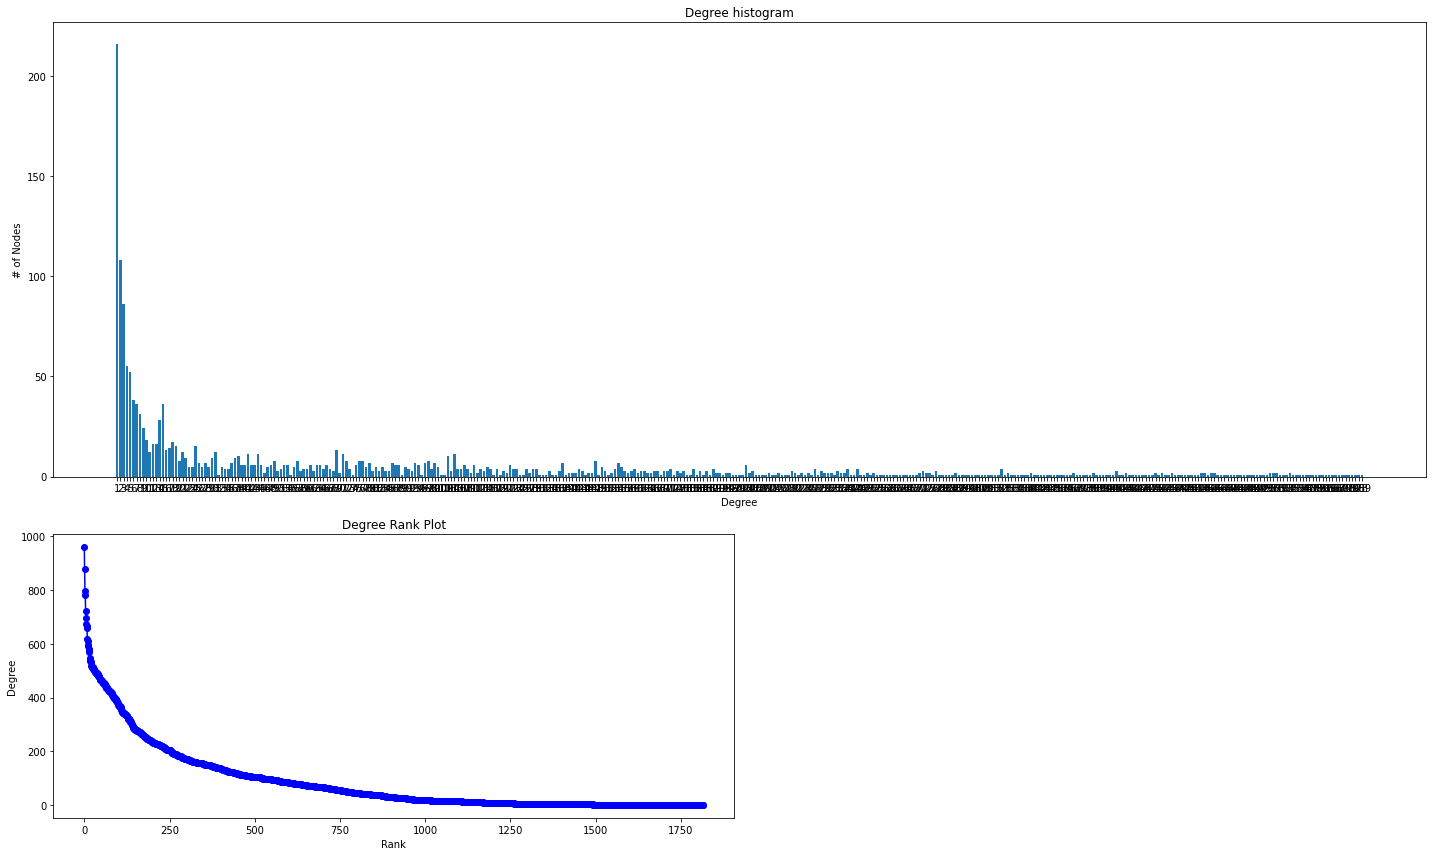

In [50]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(20, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

counts = [*np.unique(degree_sequence, return_counts=True)]
degree = counts[0].tolist()
degree = [str(i) for i in degree]
count = counts[1].tolist()

ax0 = fig.add_subplot(axgrid[0:3, :])
ax0.bar(degree,count)
ax0.set_title("Degree histogram")
ax0.set_xlabel("Degree")
ax0.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [51]:
popular_char = sorted(G.degree, key=lambda x: x[1], reverse=True)
popular_char[0:5]

[('Captain America', 959),
 ('Iron Man', 878),
 ('Doctor Doom', 798),
 ('Hulk', 780),
 ('Doctor Strange', 721)]

### DC Data

In [52]:
dc_data = pd.read_pickle('C:/Users/guzma/OneDrive/Documents/TEC/DTU/02805/assignments/data/Characters_links/dc-pandas_1_3_5.pkl')
dc_data

,CharacterName,WikiLink
0,Abel,Cain and Abel (comics)
1,Abin Sur,Abin Sur
2,Abra Kadabra (character),Abra Kadabra (character)
3,Abby Holland,Abby Holland
4,Ace the Bat-Hound,Ace the Bat-Hound
...,...,...
814,4-D,International Ultramarine Corps#Founding membe...
815,500Z-Q,Hero Hotline#Support crew
816,666,NaN
817,#711,711 (Quality Comics)


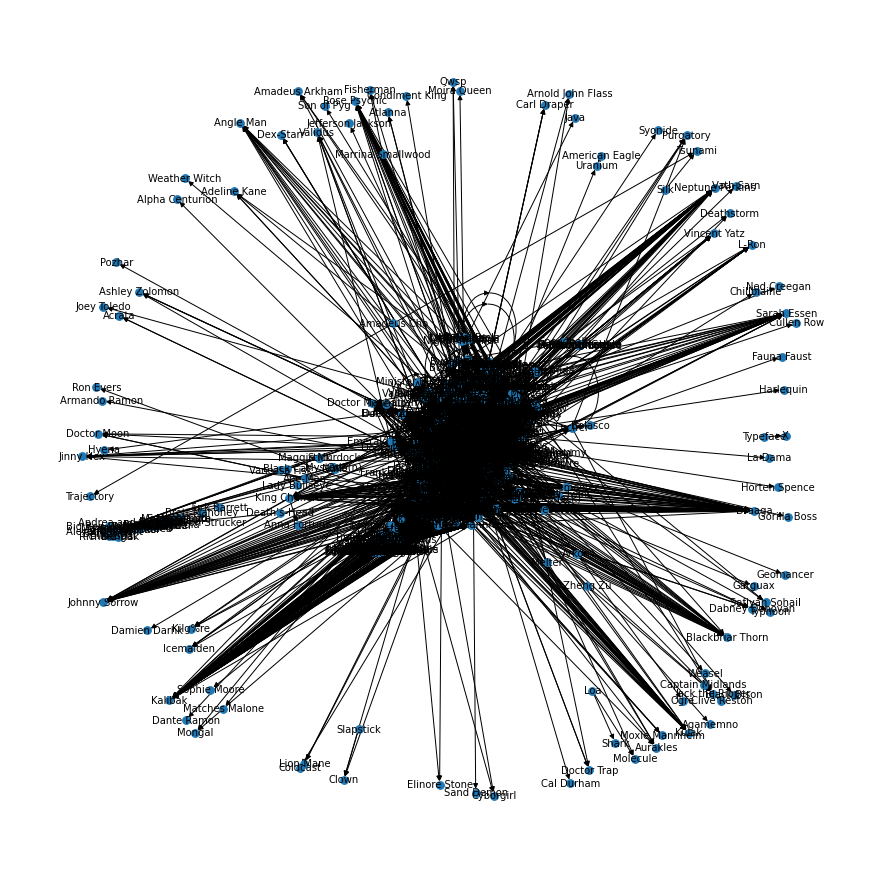

In [53]:
G = nx.DiGraph()
for char in char_check:
    character = pd.read_pickle('C:/Users/guzma/OneDrive/Documents/TEC/DTU/02805/assignments/data/Characters_links/{}.pkl'.format(char))
    for link in character:
        if link in dc_data['CharacterName'].values:
            G.add_node(link)
            G.add_edge(char,link)
plt.figure(3,figsize=(12,12)) 
nx.draw(G, with_labels=True, node_size=60,font_size=10)
plt.show()

In [54]:
print(f'Number of edges : {G.size()}')
print(f'Number of nodes : {G.order()}')
print(f'Number of link list: {G.number_of_edges()}')
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
print(f'Max degree: {dmax}')

Number of edges : 24422
Number of nodes : 1013
Number of link list: 24422
Max degree: 505


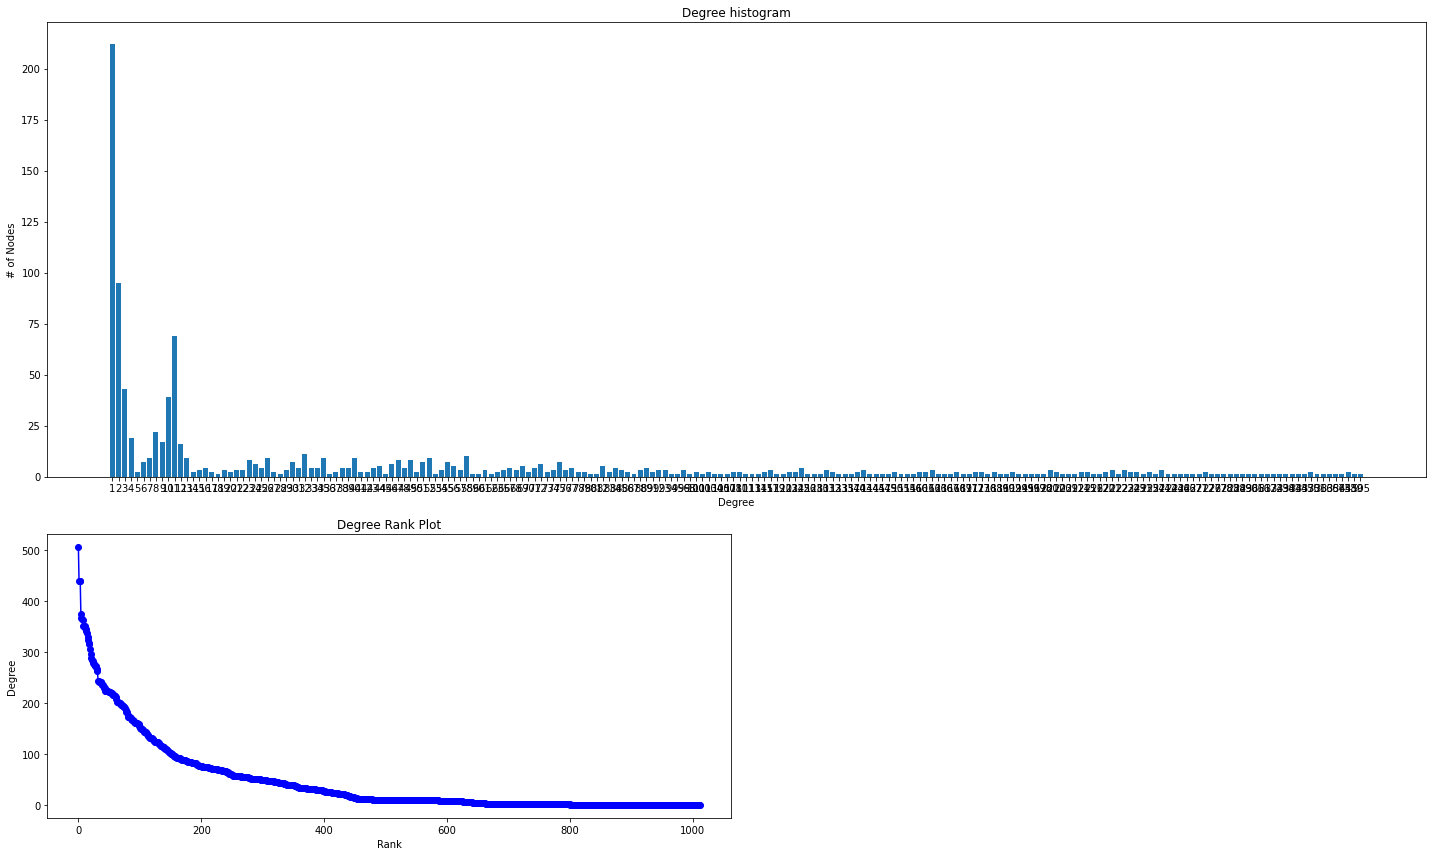

In [55]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(20, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

counts = [*np.unique(degree_sequence, return_counts=True)]
degree = counts[0].tolist()
degree = [str(i) for i in degree]
count = counts[1].tolist()

ax0 = fig.add_subplot(axgrid[0:3, :])
ax0.bar(degree,count)
ax0.set_title("Degree histogram")
ax0.set_xlabel("Degree")
ax0.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [56]:
popular_char = sorted(G.degree, key=lambda x: x[1], reverse=True)
popular_char[0:5]

[('Darkseid', 505),
 ('Green Arrow', 439),
 ('Batman', 438),
 ('Aquaman', 438),
 ('Big Barda', 375)]

#### In Degrees

In [57]:
# len(G.in_degree())
x = dict(G.in_degree())
y = np.array(list(x.values()))
print(f'Average in-degrees: {np.average(y)}')
print(f'Median in-degrees: {np.median(y)}')
print(f'Mode in-degrees: {stats.mode(y)[0]}')
print(f'Max in-degrees: {np.max(y)}')
print(f'Min in-degrees: {np.min(y)}')
# mean
# media
# mode
# min
# max

Average in-degrees: 24.108588351431393
Median in-degrees: 0.0
Mode in-degrees: [0]
Max in-degrees: 421
Min in-degrees: 0


#### Out Degrees

In [58]:
x = dict(G.out_degree())
y = np.array(list(x.values()))
print(f'Average in-degrees: {np.average(y)}')
print(f'Median in-degrees: {np.median(y)}')
print(f'Mode in-degrees: {stats.mode(y)[0]}')
print(f'Max in-degrees: {np.max(y)}')
print(f'Min in-degrees: {np.min(y)}')

Average in-degrees: 24.108588351431393
Median in-degrees: 11.0
Mode in-degrees: [1]
Max in-degrees: 106
Min in-degrees: 0


### Combined Data

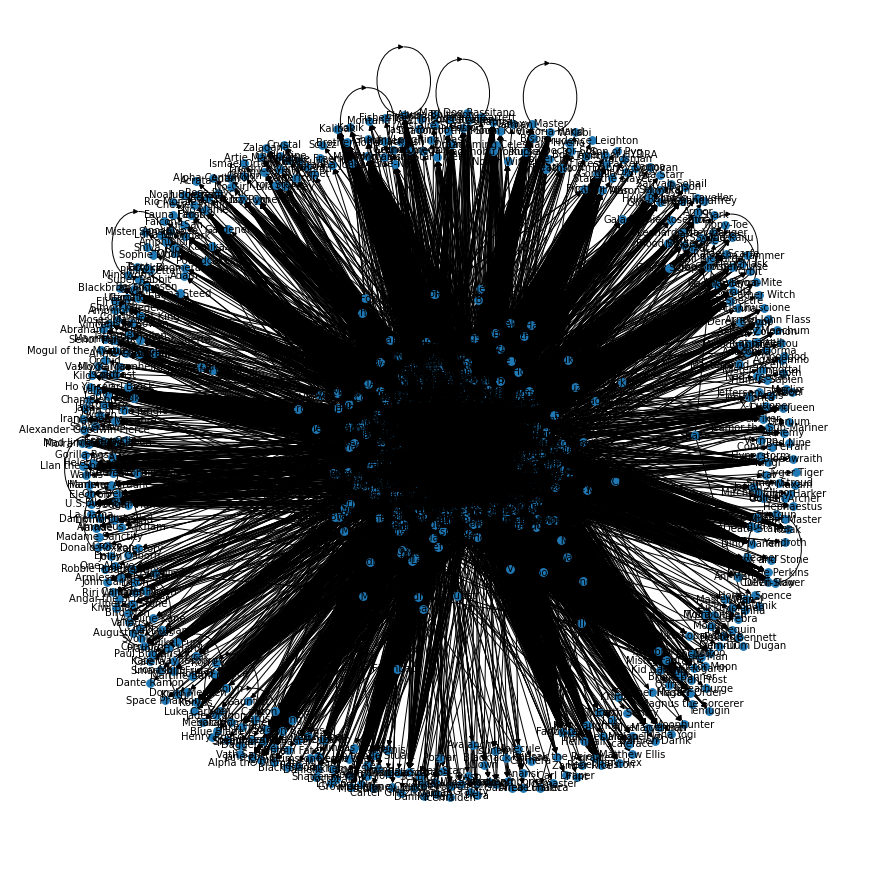

In [59]:
G = nx.DiGraph()
for char in char_check:
    # G.add_node(char)
    character = pd.read_pickle('C:/Users/guzma/OneDrive/Documents/TEC/DTU/02805/socialgraphs2022/lectures/Characters_links/{}.pkl'.format(char))
    for link in character:
        # connections = rand.randint(0,len(b))
        if link in marvel_data['CharacterName'].values:
            G.add_node(link)
            G.add_edge(char,link)
        elif link in dc_data['CharacterName'].values:
            G.add_node(link)
            G.add_edge(char,link)
plt.figure(3,figsize=(12,12)) 
nx.draw(G, with_labels=True, node_size=60,font_size=10)
plt.show()

In [60]:
print(f'Number of edges : {G.size()}')
print(f'Number of nodes : {G.order()}')
print(f'Number of link list: {G.number_of_edges()}')
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
print(f'Max degree: {dmax}')

Number of edges : 103773
Number of nodes : 2139
Number of link list: 103773
Max degree: 979


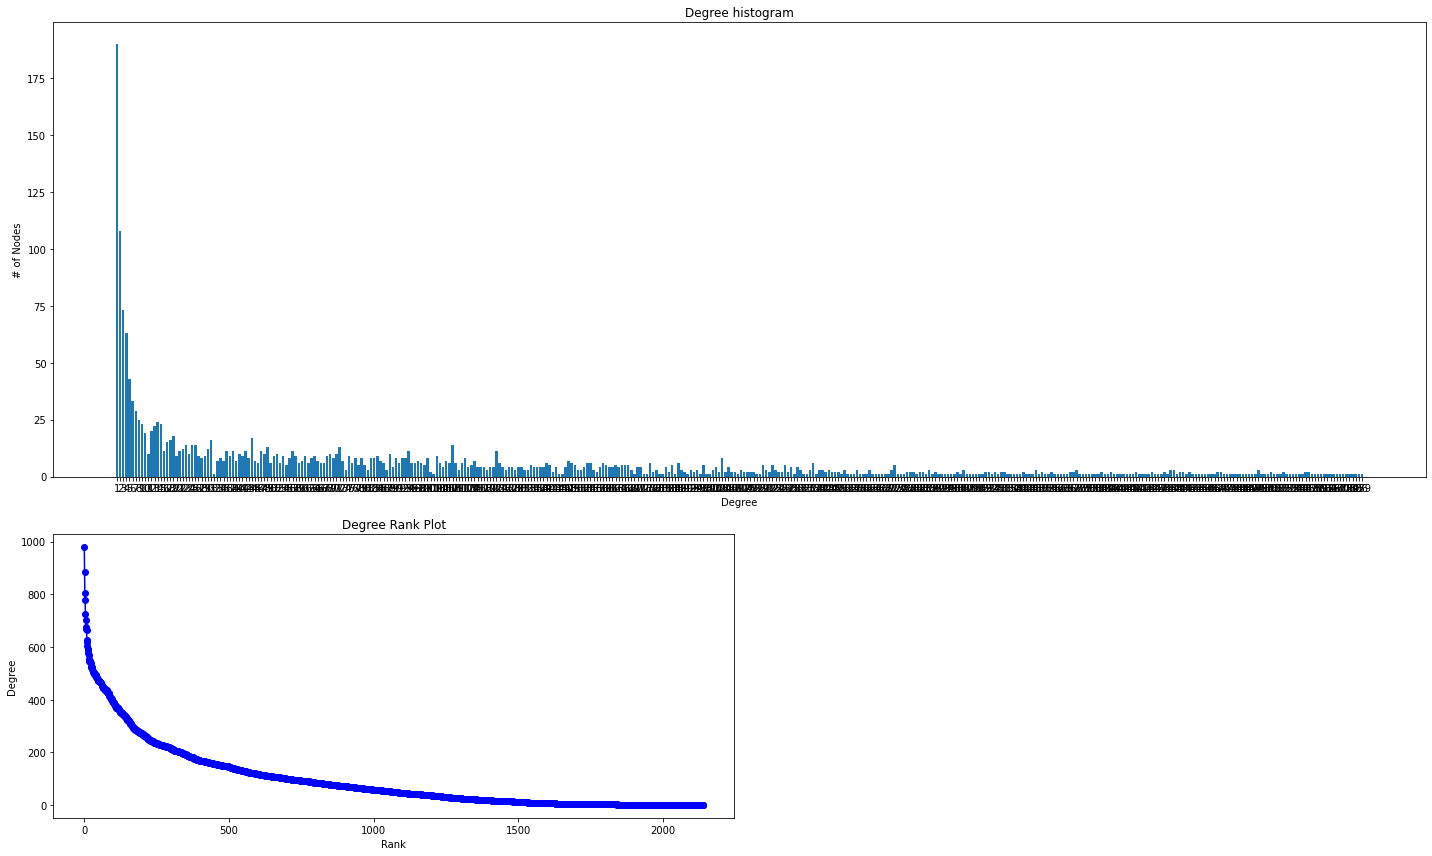

In [61]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(20, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

counts = [*np.unique(degree_sequence, return_counts=True)]
degree = counts[0].tolist()
degree = [str(i) for i in degree]
count = counts[1].tolist()

ax0 = fig.add_subplot(axgrid[0:3, :])
ax0.bar(degree,count)
ax0.set_title("Degree histogram")
ax0.set_xlabel("Degree")
ax0.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [62]:
popular_char = sorted(G.degree, key=lambda x: x[1], reverse=True)
popular_char[0:5]

[('Captain America', 979),
 ('Iron Man', 886),
 ('Doctor Doom', 805),
 ('Hulk', 780),
 ('Doctor Strange', 724)]

#### In Degrees

In [63]:
# len(G.in_degree())
x = dict(G.in_degree())
y = np.array(list(x.values()))
print(f'Average in-degrees: {np.average(y)}')
print(f'Median in-degrees: {np.median(y)}')
print(f'Mode in-degrees: {stats.mode(y)[0]}')
print(f'Max in-degrees: {np.max(y)}')
print(f'Min in-degrees: {np.min(y)}')
# mean
# media
# mode
# min
# max

Average in-degrees: 48.51472650771389
Median in-degrees: 3.0
Mode in-degrees: [0]
Max in-degrees: 883
Min in-degrees: 0


#### Out Degrees

In [64]:
x = dict(G.out_degree())
y = np.array(list(x.values()))
print(f'Average in-degrees: {np.average(y)}')
print(f'Median in-degrees: {np.median(y)}')
print(f'Mode in-degrees: {stats.mode(y)[0]}')
print(f'Max in-degrees: {np.max(y)}')
print(f'Min in-degrees: {np.min(y)}')

Average in-degrees: 48.51472650771389
Median in-degrees: 31.0
Mode in-degrees: [0]
Max in-degrees: 179
Min in-degrees: 0


# Communities

Find and visualize the communities in one or both of the superhero universes (DC/Marvel) as described in Week 7.

Write a paragraph about your work to identify the communities. The paragraph should include

* Information about the algorithm you used to find communities.
* The value of modularity for your network.
* The number of communities and their sizes (in terms of number of nodes).

For the 10 largest communities, process the text in order to create a TF-IDF vector for each community. Explain in your own words how TF-IDF works.

Then visualize the TF-IDF vectors using wordclouds (as described in Week 7). Remember to comment on your word-clouds (e.g. in the figure captions): Do the wordclouds/TF-IDF lists enable you to understand the communities you have found (or is it just gibberish)? Justify your answer.

# Sentiment

First calculate the sentiment for all character pages. Calculate the mean value of the sentiment and the 10th and 90th percentile values for the sentiment. Then create a nice histogram displaying the distribution of sentiment values for all pages. Indicate the mean, etc on that histogram.

Now grab the good/bad character names (see Week 8 for details) and calculate the same stats for only good/bad characters; also plot the histograms for the good/bad group and indicate the values of the mean, etc.

Finally use the label permutation test (see Week 5) to investigate the two hypotheses below
* H1: Good characters have a higher averge value for sentiment than a similarly sized set of randomly selected characters.
* H2: Bad characters have a lower average value for sentiment than a similarly sized set of randomly selected characters.

Write a short paragraph reflecting on your findings.